# 👨‍🏫 Teacher Guide: Creating Assignments

This notebook shows you **step-by-step** how to create homework assignments using the Local Grader System.

## 📋 What You'll Learn:
- How to create a new homework assignment
- How to add different types of test cases
- How to simulate student submissions
- How to view grades and analytics

## 🎯 Follow These Steps in Order!

## Step 1: Initialize the Grading System

**Run this cell first** to load the grading system and create your homework assignment.

In [1]:
# Import the Local Grader System
from local_grader import LocalGrader
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# STEP 1: Choose your homework name (CHANGE THIS for each assignment)
homework_name = "Python_Homework_1"  # 📝 EDIT THIS NAME

# Create the grader
grader = LocalGrader(homework_name)

print(f"✅ Created homework assignment: {homework_name}")
print(f"📁 Data will be stored in: grader_data/")
print(f"📊 Current max score: {grader.homework_data['max_score']} points")

✅ Created homework assignment: Python_Homework_1
📁 Data will be stored in: grader_data/
📊 Current max score: 0 points


## Step 2A: Add a Math Function Test

**Example**: Testing if students can write a function to calculate circle area.

In [2]:
# STEP 2A: Create a math function test
def test_circle_area(submission):
    """
    Test if the student correctly implemented circle_area function
    """
    # Check if function exists
    if 'circle_area' not in submission:
        return {"score": 0, "feedback": "❌ Function 'circle_area' not found!"}
    
    func = submission['circle_area']
    
    # Test with multiple inputs
    test_cases = [
        (1, math.pi),           # radius=1, expected=π
        (3, 9 * math.pi),       # radius=3, expected=9π
        (0, 0),                 # radius=0, expected=0
        (5.5, 30.25 * math.pi)  # radius=5.5, expected=30.25π
    ]
    
    score = 0
    feedback_parts = []
    
    for radius, expected in test_cases:
        try:
            result = func(radius)
            if abs(result - expected) < 0.001:  # Allow small floating point errors
                score += 1
                feedback_parts.append(f"✅ Correct for radius={radius}")
            else:
                feedback_parts.append(f"❌ Wrong for radius={radius}: got {result}, expected {expected:.3f}")
        except Exception as e:
            feedback_parts.append(f"❌ Error for radius={radius}: {str(e)}")
    
    final_score = score / len(test_cases)
    feedback = f"Circle Area Test: {score}/{len(test_cases)} test cases passed\n" + "\n".join(feedback_parts)
    
    return {"score": final_score, "feedback": feedback}

# Add this test to your homework (10 points)
grader.add_test_case(
    test_name="circle_area_test",
    test_function=test_circle_area,
    points=10,
    description="Test circle area calculation function"
)

print("✅ Added math function test (10 points)")

✅ Added test case 'circle_area_test' (10 points)
✅ Added math function test (10 points)


## Step 2B: Add a Data Analysis Test

**Example**: Testing if students can create and manipulate DataFrames.

In [3]:
# STEP 2B: Create a DataFrame test
def test_student_dataframe(submission):
    """
    Test if student created a proper DataFrame with student data
    """
    # Check if DataFrame exists
    if 'student_data' not in submission:
        return {"score": 0, "feedback": "❌ Variable 'student_data' not found!"}
    
    df = submission['student_data']
    
    # Check if it's actually a DataFrame
    if not isinstance(df, pd.DataFrame):
        return {"score": 0, "feedback": "❌ 'student_data' is not a pandas DataFrame!"}
    
    score = 0
    max_score = 4
    feedback_parts = []
    
    # Test 1: Check shape (should have at least 10 rows, 3 columns)
    if df.shape[0] >= 10 and df.shape[1] >= 3:
        score += 1
        feedback_parts.append(f"✅ Good shape: {df.shape} (at least 10 rows, 3 columns)")
    else:
        feedback_parts.append(f"❌ Shape too small: {df.shape} (need at least 10 rows, 3 columns)")
    
    # Test 2: Check required columns
    required_columns = ['name', 'age', 'grade']
    if all(col in df.columns for col in required_columns):
        score += 1
        feedback_parts.append("✅ Has required columns: name, age, grade")
    else:
        missing = [col for col in required_columns if col not in df.columns]
        feedback_parts.append(f"❌ Missing columns: {missing}")
    
    # Test 3: Check data types
    if 'age' in df.columns and pd.api.types.is_numeric_dtype(df['age']):
        score += 1
        feedback_parts.append("✅ Age column is numeric")
    else:
        feedback_parts.append("❌ Age column should be numeric")
    
    # Test 4: Check for no missing values
    if df.isnull().sum().sum() == 0:
        score += 1
        feedback_parts.append("✅ No missing values")
    else:
        feedback_parts.append(f"❌ Has {df.isnull().sum().sum()} missing values")
    
    final_score = score / max_score
    feedback = f"DataFrame Test: {score}/{max_score} requirements met\n" + "\n".join(feedback_parts)
    
    return {"score": final_score, "feedback": feedback}

# Add this test to your homework (15 points)
grader.add_test_case(
    test_name="dataframe_test",
    test_function=test_student_dataframe,
    points=15,
    description="Test DataFrame creation and structure"
)

print("✅ Added DataFrame test (15 points)")

✅ Added test case 'dataframe_test' (15 points)
✅ Added DataFrame test (15 points)


## Step 2C: Add an Algorithm Test

**Example**: Testing if students can implement a sorting algorithm.

In [4]:
# STEP 2C: Create an algorithm test
def test_sorting_algorithm(submission):
    """
    Test if student implemented a working sort function
    """
    # Check if function exists
    if 'my_sort' not in submission:
        return {"score": 0, "feedback": "❌ Function 'my_sort' not found!"}
    
    func = submission['my_sort']
    
    # Test cases with different scenarios
    test_cases = [
        ([3, 1, 4, 1, 5], [1, 1, 3, 4, 5]),      # Regular case with duplicates
        ([1], [1]),                               # Single element
        ([], []),                                 # Empty list
        ([5, 4, 3, 2, 1], [1, 2, 3, 4, 5]),     # Reverse sorted
        ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])      # Already sorted
    ]
    
    score = 0
    feedback_parts = []
    
    for input_list, expected in test_cases:
        try:
            # Make a copy to avoid modifying original
            test_input = input_list.copy()
            result = func(test_input)
            
            if result == expected:
                score += 1
                feedback_parts.append(f"✅ Correct for {input_list}")
            else:
                feedback_parts.append(f"❌ Wrong for {input_list}: got {result}, expected {expected}")
        except Exception as e:
            feedback_parts.append(f"❌ Error for {input_list}: {str(e)}")
    
    final_score = score / len(test_cases)
    feedback = f"Sorting Test: {score}/{len(test_cases)} test cases passed\n" + "\n".join(feedback_parts)
    
    return {"score": final_score, "feedback": feedback}

# Add this test to your homework (20 points)
grader.add_test_case(
    test_name="sorting_test",
    test_function=test_sorting_algorithm,
    points=20,
    description="Test sorting algorithm implementation"
)

print("✅ Added sorting algorithm test (20 points)")
print(f"\n🎯 Total assignment worth: {grader.homework_data['max_score']} points")

✅ Added test case 'sorting_test' (20 points)
✅ Added sorting algorithm test (20 points)

🎯 Total assignment worth: 45 points


## Step 3: Test Your Assignment

**Create sample student submissions** to test if your grading works correctly.

In [5]:
# STEP 3: Test with a perfect student submission

# Perfect implementations
def perfect_circle_area(radius):
    return math.pi * radius * radius

def perfect_sort(arr):
    return sorted(arr)

# Perfect DataFrame
perfect_dataframe = pd.DataFrame({
    'name': [f'Student_{i}' for i in range(15)],
    'age': np.random.randint(18, 25, 15),
    'grade': np.random.randint(70, 100, 15)
})

# Create perfect submission
perfect_submission = {
    'circle_area': perfect_circle_area,
    'student_data': perfect_dataframe,
    'my_sort': perfect_sort
}

# Grade the perfect submission
result = grader.submit("excellent_student", perfect_submission)

print("🎯 PERFECT STUDENT RESULTS:")
print(f"Total Score: {result['total_score']}/{result['max_score']} ({result['percentage']:.1f}%)")
print("\nDetailed Results:")
for test_name, test_result in result['test_results'].items():
    print(f"  📝 {test_name}: {test_result['points_earned']:.1f}/{test_result['points_possible']} points")
    print(f"     Status: {test_result['status']}")
    if test_result['feedback']:
        feedback_preview = test_result['feedback'][:100] + ('...' if len(test_result['feedback']) > 100 else '')
        print(f"     Feedback: {feedback_preview}")

🎯 PERFECT STUDENT RESULTS:
Total Score: 45.0/45 (100.0%)

Detailed Results:
  📝 circle_area_test: 10.0/10 points
     Status: PASS
     Feedback: Circle Area Test: 4/4 test cases passed
✅ Correct for radius=1
✅ Correct for radius=3
✅ Correct for ...
  📝 dataframe_test: 15.0/15 points
     Status: PASS
     Feedback: DataFrame Test: 4/4 requirements met
✅ Good shape: (15, 3) (at least 10 rows, 3 columns)
✅ Has requi...
  📝 sorting_test: 20.0/20 points
     Status: PASS
     Feedback: Sorting Test: 5/5 test cases passed
✅ Correct for [3, 1, 4, 1, 5]
✅ Correct for [1]
✅ Correct for []...


## Step 4: Test with Imperfect Submission

**Test how your grading handles mistakes** and partial credit.

In [6]:
# STEP 4: Test with an imperfect student submission

# Imperfect implementations
def imperfect_circle_area(radius):
    return 3.14 * radius * radius  # Uses approximation instead of math.pi

def bubble_sort(arr):
    # Inefficient but correct bubble sort
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Imperfect DataFrame (wrong column names)
imperfect_dataframe = pd.DataFrame({
    'student_name': [f'Student_{i}' for i in range(12)],  # Wrong column name
    'student_age': np.random.randint(18, 25, 12),          # Wrong column name
    'final_grade': np.random.randint(60, 100, 12)          # Wrong column name
})

# Create imperfect submission
imperfect_submission = {
    'circle_area': imperfect_circle_area,
    'student_data': imperfect_dataframe,
    'my_sort': bubble_sort
}

# Grade the imperfect submission
result2 = grader.submit("struggling_student", imperfect_submission)

print("🎯 IMPERFECT STUDENT RESULTS:")
print(f"Total Score: {result2['total_score']:.1f}/{result2['max_score']} ({result2['percentage']:.1f}%)")
print("\nDetailed Results:")
for test_name, test_result in result2['test_results'].items():
    print(f"  📝 {test_name}: {test_result['points_earned']:.1f}/{test_result['points_possible']} points")
    print(f"     Status: {test_result['status']}")
    if test_result['feedback']:
        feedback_preview = test_result['feedback'][:150] + ('...' if len(test_result['feedback']) > 150 else '')
        print(f"     Feedback: {feedback_preview}")
    print()

🎯 IMPERFECT STUDENT RESULTS:
Total Score: 30.0/45 (66.7%)

Detailed Results:
  📝 circle_area_test: 2.5/10 points
     Status: PARTIAL
     Feedback: Circle Area Test: 1/4 test cases passed
❌ Wrong for radius=1: got 3.14, expected 3.142
❌ Wrong for radius=3: got 28.259999999999998, expected 28.274
✅...

  📝 dataframe_test: 7.5/15 points
     Status: PARTIAL
     Feedback: DataFrame Test: 2/4 requirements met
✅ Good shape: (12, 3) (at least 10 rows, 3 columns)
❌ Missing columns: ['name', 'age', 'grade']
❌ Age column shou...

  📝 sorting_test: 20.0/20 points
     Status: PASS
     Feedback: Sorting Test: 5/5 test cases passed
✅ Correct for [3, 1, 4, 1, 5]
✅ Correct for [1]
✅ Correct for []
✅ Correct for [5, 4, 3, 2, 1]
✅ Correct for [1, 2...



## Step 5: View Grade Analytics

**Check class performance** and generate reports.

📊 CLASS ANALYTICS
👥 Total Students: 2
📈 Average Score: 37.5/45 (83.3%)
🔝 Highest Score: 45.0/45
📉 Lowest Score: 30.0/45

👥 INDIVIDUAL RESULTS:
  📝 excellent_student: 45.0/45 (100.0%) - 1 submissions
  📝 struggling_student: 30.0/45 (66.7%) - 1 submissions


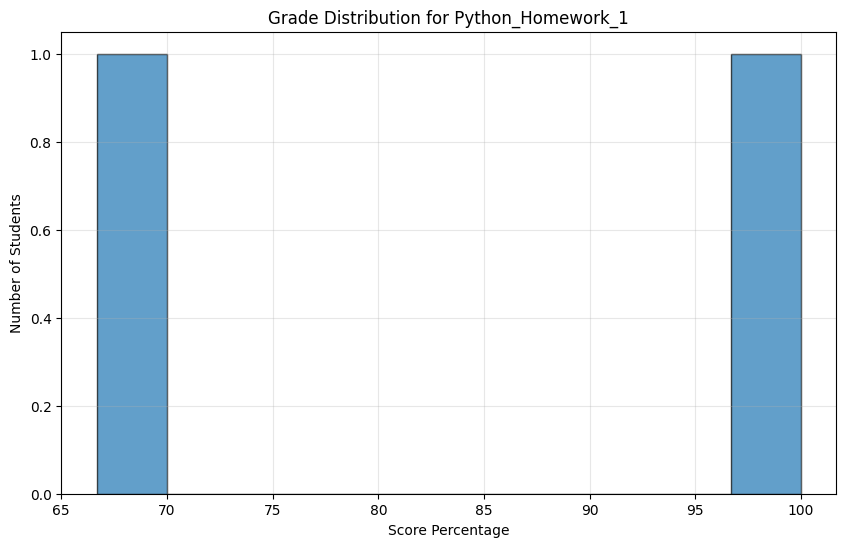


✅ Assignment creation complete!
📁 All data saved in: grader_data/
📝 Share this homework name with students: 'Python_Homework_1'


In [7]:
# STEP 5: View grade analytics

# Get all student grades from the grader's data
all_grades = grader.grades_data["students"]

print("📊 CLASS ANALYTICS")
print("=" * 50)

if all_grades:
    # Calculate statistics
    scores = [grade_data['best_score'] for grade_data in all_grades.values()]
    
    print(f"👥 Total Students: {len(scores)}")
    print(f"📈 Average Score: {np.mean(scores):.1f}/{grader.homework_data['max_score']} ({np.mean(scores)/grader.homework_data['max_score']*100:.1f}%)")
    print(f"🔝 Highest Score: {max(scores):.1f}/{grader.homework_data['max_score']}")
    print(f"📉 Lowest Score: {min(scores):.1f}/{grader.homework_data['max_score']}")
    
    # Show individual student results
    print("\n👥 INDIVIDUAL RESULTS:")
    for student_id, data in all_grades.items():
        percentage = (data['best_score'] / grader.homework_data['max_score']) * 100
        print(f"  📝 {student_id}: {data['best_score']:.1f}/{grader.homework_data['max_score']} ({percentage:.1f}%) - {len(data['submissions'])} submissions")
    
    # Create a simple grade distribution plot
    plt.figure(figsize=(10, 6))
    plt.hist([s/grader.homework_data['max_score']*100 for s in scores], bins=10, alpha=0.7, edgecolor='black')
    plt.xlabel('Score Percentage')
    plt.ylabel('Number of Students')
    plt.title(f'Grade Distribution for {homework_name}')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No student submissions yet!")

print("\n✅ Assignment creation complete!")
print(f"📁 All data saved in: grader_data/")
print(f"📝 Share this homework name with students: '{homework_name}'")

## 🎉 You're Done!

### What You Created:
- ✅ **Homework Assignment**: `{homework_name}`
- ✅ **3 Test Cases**: Math function (10 pts), DataFrame (15 pts), Sorting (20 pts)
- ✅ **Total Points**: 45 points
- ✅ **Sample Submissions**: Tested with perfect and imperfect examples

### Next Steps:
1. **📝 Modify test cases** above to match your curriculum
2. **📊 Create student assignment** using the Student Guide
3. **👥 Share homework name** with your students
4. **📈 Monitor progress** using the analytics above

### Files Created:
- `grader_data/homework_{homework_name}.json` - Assignment configuration
- `grader_data/grades_{homework_name}.json` - Student grades
- `grader_data/tests_{homework_name}/` - Test case files

**Your assignment is ready for students!** 🚀